# Newage Betting Adoption - Data driven betting on NBA Players

## 1. Executive Summary/Synopsis. 

#### Introduction : National Basketball Association
The National Basketball Association, or NBA, is a professional basketball league comprised of 30 teams across North America featuring the best basketball players in the world broken down by two conferences with three divisions apiece. The Western Conference plays host to the Northwest, Pacific and Southwest Divisions. It was founded on June 6, 1946 at the Commodore Hotel in New York City. Maurice Podoloff was the league's first president, a title later changed to commissioner. Eleven teams were part of that league, originally called the Basketball Association of America.

#### Betting scenario in Sports industry
It is true that bookies do not gamble more than other businessmen. If they are competent they set the odd so that there is close-to-even exposure on both sides, so that it does not matter who wins in the long run, their pay-out is the same and they make their safely money on the vigorish. Averaging over time allows adjustment of imperfections in the odds setting. Its all about making the most money possible in a predictable way.

But book making is not an instantaneous frictionless process. Bookies make mistakes, which will cost them. They will pay-out too much and thus not make what they expect on the vig. They will make it up in time, but a loss is a loss.

In this lab project, we aim to illustrate how the sports gambling industry specific who gamble on NBA players can benifit from data-driven sports betting and make their odds better by eliminating their options of bad bets thereby reducing the amount of mistakes that they would make.

#### Problem Statement: 
If we were to bet on specific players that are super efficient during the last portion of the NBA game, how can we make our odds better? Our project aims to find out specific players out of 702 active NBA players that have been known to efficiently perform during the last minutes of the game. In a nutshell:

<b>`Betting Problem:`</b> Which player should a gambler/bookies should bet on during 4th quarter and Over Time quarter that have higher chances to make shoot from different regions explained later.

#### Methodology Synopsis:
We will use a popular unsupervised learning algorithm known as ```KMeans``` with a hope to find appropriate clusters that should help address our conundrum and define genres of players based on that. K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 
But before Kmeans, we will also grind our processed data through a popular Dimensionality Reduction Technique known as Principal Component Analysis, which is a technique used for identification of a smaller number of uncorrelated variables known as principal components from a larger set of data. 

For Data Wrangling and Manipulation, we will use text manipulation techniques like Regex and String Manipulation, data manipulation tools from Pandas and data visualizations from seaborn, wordcloud and matplotlib.

#### Process Flow:

1. Data Scraping from Basketball Reference specific to shooting data.
2. Data Storage in SQLite database
3. Data Extraction and loading into pandas dataframe
4. Cleaning and Manipulating Data
5. Exploratory Data Analysis, including nearest K to find prelimnary similarity on aggregated data.
6. Dimensionality Reduction on processed data
7. KMeans Clustering: Indentifying clusters,computing SSE and Inertia validation metrics, building wordcloud visualization based on number of clusters
8. Results and Conclusion

## 2. Data Description. 
We will be using the data available in www.basketball-references.com in order to conduct our research. Basketball Reference is a repository of Basketball Stats and History Statistics, scores, and history for the NBA, ABA, WNBA, and top European competition maintained and contributed by the following key people:

1. <b>Sean Lahman</b> donated much of the data used to create this site. While I have made many additions and modifications to Sean's data, he saved a significant amount of time.
2. <b>Chip Hart</b> provided constructive comments on the site's design prior to its release.
3. <b>Kevin Cohen</b> helped collect ABA schedules and results.
4. <b>Tom Timmerman</b> supplied the ABA coaching data.


<img src="1.png" width="600" height="600" />


This website is a large repository of data pertained to NBA players. For our research, we only focused on the Shooting Data(Tablular data depicted below) of <b>`NBA active players`</b> which accounts for aggregated shooting stats per year per player with an additional visual data on the shooting coordinates layered on the half court of the basketball court, which tells about the positions(or coordinates) from where the player took a shot along with additional insights on each point.

<img src="2.png" width="500" height="500" />

**A) Metrics Pertained to Shooting Data(Tabular):** 

1. `Split`: This column essentially is the categorization of the shooting related metrics mentioned later for different scenarios. This is a classification metric.

2. `Value`: It the the metric associated with the split. For example, Game Location can have two values, either Home or Road based on the split. This is also a classification metric.

3. `FG`: Field Goals (includes both 2-point field goals and 3-point field goals)

4. `FGA`: Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts)

5. `FG%`: Field Goal Percentage; the formula is FG / FGA.

6. `3P`: 3-Point Field Goals (available since the 1979-80 season in the NBA)

7. `3PA`: 3-Point Field Goal Attempts (available since the 1979-80 season in the NBA)

8. `3P%`: 3-Point Field Goal Percentage (available since the 1979-80 season in the NBA); the formula is 3P / 3PA.


9. `eFG%`: Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal. For example, suppose Player A goes 4 for 10 with 2 threes, while Player B goes 5 for 10 with 0 threes. Each player would have 10 points from field goals, and thus would have the same effective field goal percentage (50%).

10. `AST`: Assists

11. `AST%`: Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor.

<img src="3.png" width="500" height="500" />

**B) Metrics Pertained to Shot Chart:** 
There are no specific lables assigned to this data, however, the tooltip of each coordinates had specific datapoints which are interesting datapoint for our model explained later. Following is the naming convention and the meaning of the data points:

1. ```Goal```: It depicts whether the shot was made or missed.

2. `Coor1`: Coordinate 1, which depicts the y coordinate of the point from where the shot was taken

3. `Coor2`: Coordinate 1, which depicts the x coordinate of the point from where the shot was taken.

4. `Date`: Date at which shot was taken

5. `Year`: Year at which shot was taken

6. `Quarter`: Quarter of the game at which shot was taken

7. `Team`: Team of the player

8. `Opp`: Opponent team during which the specfic shot was taken

9. `Time_rem`: remaining time for the end of the quarter at which shot was taken

<img src="4.png" width="500" height="500" />

## 3. Data Processing and Extraction. 
#### 1. Web Scraping
Data from http://www.basketball-reference.com/ was extracted (commonly known as web scraping) using BeautifulSoup package. BeautifulSoup is a Python library for parsing HTML and XML files. It creates a parse tree for parsed pages that can be used to extract data from HTML.

Scraping the tabular data was straightforward, however, scraping data for individual coordinates involved usage of a specific function from BeautifulSoup known as CData, which is essentially usd to get the content from the comment section under the DIV container.

#### 2. Storing in a database
Extracted data was loaded to tables in a **SQLite** database named <*nba_data.db*>. SQLite is a C library that can be used in Python that provides a lightweight disk-based database that doesn’t require a separate server process.

The Database contains primarily two tables viz:

1. **Shoot_Table**: This table has all the scraped data from the tabular data mentioned above.

2. **Chart_Main**: This table has all the scraped data from the visualization mentioned above.

#### 3. Extraction and Storage in Action:
##### Loading Libraries and Modules:

In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import re
import json
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
import requests
import json
import numpy as np
import os
from collections import Counter
import pickle
import warnings
warnings.filterwarnings("ignore")

#Modelling and Clustering Libraries:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from sklearn.metrics import calinski_harabaz_score, silhouette_score
from kypy import cluster_range, intra_to_inter, plot_internal, plot_clusters
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import PIL
from PIL import Image, ImageFilter
%matplotlib inline

# Use proxy and headers for safe web scraping
os.environ['HTTPS_PROXY'] = 'http://3.112.188.39:8080'

# pd.options.mode.chained_assignment = None
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/'
    '537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}

##### Initializing SQL Connection

In [3]:
conn = sqlite3.connect('nba_data.db')

##### Scraping Initiates: 
##### 1. Extracting Player ID's of Active NBA Players
``` python
# Getting Player ID's
alphabets=list('abcdefghijklmnopqrstuvwxyz')

# Getting html data from Basketball Reference:
source = requests.get('https://www.basketball-reference.com/players/a', headers=headers).text
soup = BeautifulSoup(source, 'lxml')

pid=[]
playerdict = {}
alphabets=list('abcdefghijklmnopqrstuvwxyz')
for alphabet in alphabets:
    source = requests.get('https://www.basketball-reference.com/players/'+alphabet, headers=headers).text
    soup = BeautifulSoup(source, 'lxml')
    for i in range(len(soup.select('table tr > th > a '))):
        try:
            print(soup.select('table tr > th > strong > a')[i].get('href'))
            pid.append(soup.select('table tr > th > strong > a')[i].get('href'))
            playerdict.update({soup.select('table tr > th > strong > a ')[i].text:soup.select('table tr > th > strong > a')[i].get('href')})
        except IndexError:
            pass

# Dictionary of all the players with their respective urls:
playername = []
for key in playerdict.keys():
    playername.append(key)            
```

##### 2. Extracting Shooting Data
###### 2.a Tabular Data

```python 
yearurl=[]
player_shootdict = {}
mainurl= 'https://www.basketball-reference.com'
for player in playername:
    yearurl = []
    source = requests.get(mainurl+playerdict[player],headers=headers).text
    soup = BeautifulSoup(source, 'lxml')
    shooturl = soup.select('#inner_nav > ul > li')[4].select('a')
    for i in range(len(shooturl)):
        yearurl.append(shooturl[i].get('href'))
    player_shootdict.update({player:yearurl})
    ```

```python
# Storing URL's(per year as a list) along with player name in a dictionary and then dumping it in a Pickle File
with open('player_shootdict.pkl', 'wb') as handle:
    pickle.dump(player_shootdict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    ```

``` python
# Using the stored pickle file for accessing player id's and their respective shooting urls
with open('player_shootdict.pkl','rb') as f:
    player_shootdict = pickle.load(f)
    ```

``` python
#Extraction and Preprocessing
playerurl = [item for sublist in player_shootdict.values() for item in sublist]
playername = []
for key in player_shootdict.keys():
    playername.append(key)

#For getting headers of the column for tabular data:
source = requests.get('https://www.basketball-reference.com/players/j/'
                      'jamesle01/shooting/2004',headers=headers).text
soup = BeautifulSoup(source, 'lxml')
shootheader = soup.select('#shooting > tr.thead')[0].text.split('\n')
shootheader.remove('')
shootheader.remove('')

# Creating empty Dataframes for future
shootchart = pd.DataFrame()
shootdata = pd.DataFrame(columns=shootheader)
playerdata = pd.DataFrame()

# Getting rid of split for a while. Will be hardcoding the values later
shootheader = shootheader[1:]

#Make sure to re run this function whenever scraping interrupts:
def shoot_player(player_shootdict):
''' Return the updated Player ID's that are yet to be updated in the SQL DB.
    It eliminates the duplicacy and rescraping of the same player data again if the scraping
    interrupts in the middle'''
    
    try:  
        df = pd.read_sql('''SELECT * FROM Shoot_Table''', conn)
        players = df['player'].unique()
        new_list = []
        for player,urls in player_shootdict.items():
            if player in players:
                pass
            else:
                new_list.append(player)
    except:
        return player_shootdict
    return {k: player_shootdict[k] for k in new_list}
shoot_player_edit = shoot_player(player_shootdict)

```

``` python
#BOILER PLATE: Scraping all the tabular data and storing it in Shoot_table SQL Database
mainurl= 'https://www.basketball-reference.com'
for player,urls in shoot_player_edit.items():
    for url in urls:
        source = requests.get(mainurl+url,
                              headers=headers).text 
        year = re.findall(r'.*(\d{4})',url)[0]
        soup = BeautifulSoup(source, 'lxml')
        soupdatashoot = soup.select("#shooting > tr > td")
        shoot_data_main = []
        shoot_data = []
        for i in range(len(soupdatashoot)):
            shoot_data.append(soupdatashoot[i].text)
            if len(shoot_data) == 10:
                shoot_data_main.append(shoot_data)
                shoot_data = []
            else:
                continue
            df_shoot = pd.DataFrame(shoot_data_main,columns=shootheader)
            df_shoot['player'] = player
            df_shoot['year'] = year
        df_shoot.to_sql('Shoot_Table',conn,if_exists='append')
        ```

##### 2.b Shoot Chart

``` python
#Splitting Dictionaries into halves for dividing manpower
def split_dict_equally(input_dict, chunks=2):
    "Splits dict by keys. Returns a list of dictionaries."
    # prep with empty dicts
    return_list = [dict() for idx in range(chunks)]
    idx = 0
    for k,v in input_dict.items():
        return_list[idx][k] = v
        if idx < chunks-1:  # indexes start at 0
            idx += 1
        else:
            idx = 0
    return return_list
    
    
# Make sure to re run this function whenever scraping interrupts:
def shoot_player_chart(player_shootdict):
''' Return the updated Player ID's that are yet to be updated in the SQL DB.
    It eliminates the duplicacy and rescraping of the same player data again if the scraping
    interrupts in the middle'''
    try:  
        df = pd.read_sql('''SELECT * FROM Chart_Main''', conn)
        players = df['player'].unique()
        new_list = []
        for player,urls in player_shootdict.items():
            if player in players:
                pass
            else:
                new_list.append(player)
    except:
        return player_shootdict
    return {k: player_shootdict[k] for k in new_list}
shoot_player_chart = shoot_player_chart(player_shootdict)



#BOILER PLATE: Scraping all the chart data and storing it in Chart_Main SQL Database
from bs4 import CData
colheader = ['goal','coor1','coor2','date','year','opponent','quarter',
            'time_rem','goal_comment']
mainurl= 'https://www.basketball-reference.com'
for player,urls in shoot_player_chart.items():
    try:
        for url in urls:
            source = requests.get(mainurl+url,
                                  headers=headers).text
            soup = BeautifulSoup(source, 'lxml')
            comment = soup.select('#all_shot-chart')[0].contents[5]
            cdata = CData(soup.select('#all_shot-chart')[0].contents[5])
            x = comment.replace_with(cdata)
            soup1 = BeautifulSoup(x, "html.parser")
            soup2 = soup1.find_all('div',
                           {'class':'shot-area'})[0]
            shoot_data_main = []
            shoot_data = []
            for i in range(len(soup2)):
                try:
                    y = soup2.select('div')[i].attrs
                    goal = y['class'][1].split(' ')
                    coor1 = re.findall(r'top:(\d+)px;left:(\d+)px;',y['style'])[0][0].split(' ')
                    coor2 = re.findall(r'top:(\d+)px;left:(\d+)px;',y['style'])[0][1].split(' ')
                    rawdata= re.findall(r'(.*)(?:\<br\>)(.*)(?:\<br\>)(.*)(?:\<br\>)',
                                        y['tip'])[0]
                    rawdata1 = rawdata[0].split(',')
                    rawdata2 = rawdata[1].split(',')
                    rawdata3 = rawdata[2].split(',')
                    data = goal + coor1 + coor2 + rawdata1 + rawdata2 + rawdata3
                    shoot_data.append(data)
                except IndexError:
                    pass
            shoot_chart = pd.DataFrame(shoot_data,columns=colheader)
            shoot_chart['player'] = player
            shoot_chart.to_sql('Chart_Main',conn,if_exists='append')
    except IndexError:
        continue
    ```

#### Data Cleaning and Preprocessing
Converting categorical to numerical data and concatenation of columns whereever needed:

```python

conn.executescript('''UPDATE ChartMain
                      SET goal = 0
                      WHERE goal = "miss";
                      
                      UPDATE ChartMain
                      SET goal = 1
                      WHERE goal = "make";
                      
                      UPDATE ChartMain
                      SET quarter = 1
                      WHERE quarter = "1st Qtr";
                      
                      UPDATE ChartMain
                      SET quarter = 2
                      WHERE quarter = "2nd Qtr";
                      
                      UPDATE ChartMain
                      SET quarter = 3
                      WHERE quarter = "3rd Qtr";
                      
                      UPDATE ChartMain
                      SET quarter = 4
                      WHERE quarter = "4th Qtr";
                      
                      UPDATE ChartMain
                      SET quarter = 5
                      WHERE quarter = "1st OT";
                      
                      UPDATE ChartMain
                      SET quarter = 6
                      WHERE quarter = "2nd OT";
                      
                      UPDATE ChartMain
                      SET quarter = 7
                      WHERE quarter = "3rd OT";
                      
                      UPDATE ChartMain
                      SET quarter = 8
                      WHERE quarter = "4th OT";
                      
                      UPDATE ChartMain
                      SET date = TRIM(date) || ", " || TRIM(year);
                      ''')
conn.commit()
```

#### Cleaning and creating columns

In [4]:
# Team and Opponent columns
df_CM = pd.read_sql('''SELECT * FROM ChartMain''', conn)
df_opp = df_CM.opponent.str.split(r' (?:at|vs) ', expand=True)
df_opp.columns = ['team', 'opp']
df_CM = df_CM.merge(df_opp, left_index=True, right_index=True)

In [5]:
# Convert time remaining to seconds
df_CM.time_rem = df_CM.time_rem.str.strip().str.strip(" remaining")
df_time = df_CM.time_rem.str.split(":", expand=True)
df_time.columns = ['min', 'sec']
df_time = df_time.astype(float)
df_time['time'] = (60.0 * df_time['min']) + df_time['sec']
df_CM = df_CM.merge(df_time['time'], left_index=True, right_index=True)

In [6]:
# Cleaned dataframe
df_CM_cleaned = df_CM[['index', 'goal', 'coor1', 'coor2', 'date', 'year',
    'quarter', 'team', 'opp', 'time_rem', 'time', 'goal_comment', 'player']]

In [7]:
# Initial design matrix
df_main = df_CM[['coor1', 'coor2', 'quarter', 'time', 'goal']]
df_main = df_main.astype(float)

Before moving forward, we decided to divide the basketball court into three zones which are:
1. **Outer** : 3 point region aka Perimetre
2. **Middle** : Between the outer and the paint aka Mid Range
3. **Inner** : The most inner region or the paint.

We further divided the region into two, that is, left and the right regions depicted below, to find specific dominant player with that region:

<img src="NBA_Court_Zone.jpg" width="500" height="500" />

This gives us 6 different zones. Based on the coordinates we obtained from the Shot Chart Data, we decided to allocated those coordinates into these specific zone. Following code snippet does the same. 

In order to get the pixel points of the image, we used PIL Library, through which, we converted the image into numpy array of three dimension, each pixel point associated with the RGB colour scale of the picture above. After the process, we should have 6 zones in total.

In [8]:
# Loading the image file:
original = Image.open('nbahalfcourt_edit_1.png')
pix = np.array(original)

#RGB Scale for each zones
point_o_L = (255,7,7)
point_m_L = (0,133,154)
point_i_L = (6,172,0)
point_o_R = (255,80,80)
point_o_R = (24,207,217)
point_i_R = (78,225,19)

def zone(row):
    '''Returns the zone based on coordinates'''
    x = int(row['coor1'])
    y = int(row['coor2'])
    try:
        colour = tuple(pix[x][y])
    except IndexError:
        colour = (0,0,0)
    if colour == (255,7,7):
        z = 1
    elif colour == (0,133,154):
        z = 2
    elif colour == (6,172,0):
        z = 3
    elif colour ==  (255,80,80):
        z = 4
    elif colour == (24,207,217):
        z = 5
    elif colour ==  (78,225,19):
        z = 6
    else:
        z = 0
    return z

df_main['zone'] = df_main.apply(zone, axis=1)

In [9]:
# Main dataframe
df_w_zones = df_CM_cleaned.merge(df_main['zone'], left_index=True, right_index=True)

In [10]:
#
df_desm = df_main
df_desm.head()

,coor1,coor2,quarter,time,goal,zone
0,87.0,291.0,4.0,573.0,0.0,6
1,50.0,230.0,4.0,480.0,1.0,3
2,217.0,107.0,4.0,235.0,0.0,2
3,100.0,246.0,4.0,46.9,1.0,3
4,57.0,246.0,4.0,148.0,1.0,3


We will be using the above dataframe for our feature reduction and clustering

**df_desm:** It is the design matrix of all the coordinates with all the players for all the years


Now, since we are interested in the finding out the similar players that might be of interest to our stakeholders, we decided to remove those coordinates from the dataframe that has quarter 2 and 3, and zones 3 and 4. 

After researching, we found out that most of the valuable players would tend to play more seriously on the first, fourth and the overtime quarters, in which, the clutch time for 1 and 4 quarter is 2 min equivalent to 120 seconds and the full times in overtime quarters. In addition to that, after observation, we figured to remove zone 3 and 4, primarily because it addresses the inner region and almost all the players in NBA have dominance in that specific region which has shot types like Lay-Up, Dunk Shot and so. 

With that said, lets begin our wrangling process on the design matrix:

In [20]:
df_w_zones.quarter = df_w_zones.quarter.astype(float)
df_w_zones.goal = df_w_zones.goal.astype(float)
df_w_zones.time = df_w_zones.time.astype(float)
df_w_zones.year = df_w_zones.year.astype(float)
df_w_zones.zone = df_w_zones.zone.astype(float)
df_w_zones.coor1 = df_w_zones.coor1.astype(float)
df_w_zones.coor2 = df_w_zones.coor2.astype(float)

In [266]:
df_made = df_w_zones[df_w_zones.goal==1][df_w_zones.zone.isin([1,2,5,6])]
df_made1 = df_made[df_made.quarter == 4][df_made.time <= 120]
df_made2 = df_made[df_made.quarter > 4]
df_made = df_made1.append(df_made2)
df_made['player_concat'] = df_made.player.str.replace(' ', '')
df_made_dm = df_made[['coor1', 'coor2', 'quarter', 'time', 'zone']]

## 4. Exploratory Data Analysis

Shape of our dataframes: 

** Shot Chart ** : 1.6M rows X 10 Columns

** Shooting Table **: 195K rows X 11 Columns

We aim to find similar players based on nearest K for each Value under Split as explained above in the tabular data.

In [202]:
def lpnorm(vec1, vec2, p=2):
    """Compute the L_p-norm distance between vec1 and vec2
    
    If `vec1` and `vec2` are same-sized matrices, an ndarray of the L_p-norm 
    of corresponding rows will be returned instead.
    
    Parameters
    ----------
    vec1 : ndarray
        First vector
    vec2 : ndarray
        Second vector
    p : int or float, optional
        Order of L_p norm; the `p` in L_p norm
        
    Returns
    -------
    norm : float
        L_p norm distance of `vec1` and `vec2`
    """
    if len(vec1.shape) == 1:
        return (np.abs(vec1 - vec2)**p).sum()**(1./p)
    else:
        return (np.abs(vec1 - vec2)**p).sum(axis =1)**(1./p)  

In [203]:
def nearest_k(query, objects, k, dist):
    """Return the indices to objects most similar to query
    
    Parameters
    ----------
    query : ndarray
        query object represented in the same form vector representation as the
        objects
    objects : ndarray
        vector-represented objects in the database; rows correspond to 
        objects, columns correspond to features
    k : int
        number of most similar objects to return
    dist : function
        accepts two ndarrays as parameters then returns their distance
    
    Returns
    -------
    most_similar : ndarray
        Indices to the most similar objects in the database
    """
    return np.argsort([dist(i,query) for i in objects])[:k]

In [204]:
# Loading Data from Shoot_Table <- Tabular Data
df_shoot = pd.read_sql('''SELECT * FROM Shoot_Table''',conn)
df_shoot = df_shoot[df_shoot.columns[1:]]

# Data wrangling and cleaning
cols = df_shoot.columns.tolist()
cols.remove('player')
cols_float = cols
cols_float.remove('Value')
df_shoot = df_shoot.replace('',0)
df_shoot_temp =  df_shoot[cols_float].astype(float)
df_shoot_temp['player'] = df_shoot['player']
df_shoot_temp['Value'] = df_shoot['Value']
df_shoot_temp['year'] = df_shoot_temp['year'].astype(int)
col = df_shoot_temp.columns.tolist()[-1:] + df_shoot_temp.columns.tolist()[:-1]
df_shoot_temp = df_shoot_temp[col]
players = df_shoot_temp['player'].unique()

In [205]:
# List for slicing values out of main db in order to split the main db into 4 dbs for further analysis
shot_points = ['2','3']
shot_dist = ['At Rim','3 to <10 ft','10 to <16 ft','16 ft to <3-pt','3-pt']
shot_type = ['Dunk','Hook Shot','Jump Shot','Lay-Up']
shot_quarter = ['1st','2nd','3rd','4th']

In [206]:
#Grouping by and taking the average of each metrics based on the classification mentioned ealier:
df_shot_points = df_shoot_temp[df_shoot_temp['Value'].isin(shot_points)].groupby(['player','Value']).mean().reset_index()
df_shot_type = df_shoot_temp[df_shoot_temp['Value'].isin(shot_type)].groupby(['player','Value']).mean().reset_index()
df_shot_quarter = df_shoot_temp[df_shoot_temp['Value'].isin(shot_quarter)].groupby(['player','Value']).mean().reset_index().groupby(['player','Value']).mean().reset_index()
df_shot_dist = df_shoot_temp[df_shoot_temp['Value'].isin(shot_dist)].groupby(['player','Value']).mean().reset_index()

##### Shot Points Analysis:

<b>2 pointers:</b> Top 10 similar players compared to the best player under this category

In [207]:
df_shot_points.Value = df_shot_points.Value.astype(int)
df_shot_points_2 = df_shot_points[df_shot_points.Value==2]
max_fg_2 = df_shot_points_2.FG.max()
df_shot_points_2[df_shot_points_2.FG==max_fg_2]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
831,LeBron James,2,762.375,1396.25,0.547438,0.0,0.0,0.0,0.547438,261.875,0.346688,2011.5


In [208]:
df_shot_points_2_temp = df_shot_points_2[cols]

It can be observed that **LeBron James** has Highest FG. Lets find 10 similar players compared to **LeBron James**

In [209]:
df_shot_points_2.iloc[nearest_k(df_shot_points_2_temp.loc[831], df_shot_points_2_temp.to_numpy(), 11, lpnorm)]['player']

831              LeBron James
764              Kevin Durant
811         LaMarcus Aldridge
1108        Russell Westbrook
372               Dwyane Wade
285             DeMar DeRozan
444     Giannis Antetokounmpo
103               Ben Simmons
72              Anthony Davis
177           Carmelo Anthony
109             Blake Griffin
Name: player, dtype: object

<b>3 Pointers:</b> Top 10 similar players compared to the best player under this category 

In [210]:
df_shot_points_3 = df_shot_points[df_shot_points.Value==3]
max_fg_3 = df_shot_points_3.FG.max()
df_shot_points_3[df_shot_points_3.FG==max_fg_3]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1173,Stephen Curry,3,295.3,685.8,0.4334,295.3,685.8,0.4334,0.65,179.1,0.6375,2014.5


In [211]:
df_shot_points_3_temp = df_shot_points_3[cols]

It can be observed that **Stephen Curry** has Highest FG. Lets find 10 similar players compared to **Stephen Curry**

In [212]:
df_shot_points_3.iloc[nearest_k(df_shot_points_3_temp.loc[1173], df_shot_points_3_temp.to_numpy(), 11, lpnorm)]['player']

1173       Stephen Curry
783        Klay Thompson
233       Damian Lillard
552         James Harden
347     Donovan Mitchell
850          Luka Dončić
158          Buddy Hield
1044         Paul George
1242          Trae Young
753         Kemba Walker
126         Bradley Beal
Name: player, dtype: object

##### Shot Type Analysis

<b>Dunk:</b> Top 10 similar players compared to the best player under this category

In [213]:
df_shot_type_dunk = df_shot_type[df_shot_type.Value=='Dunk']
max_fg_dunk = df_shot_type_dunk.FG.max()
df_shot_type_dunk[df_shot_type_dunk.FG==max_fg_dunk]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
529,DeAndre Jordan,Dunk,192.727273,216.818182,0.881727,0.0,0.0,0.0,0.881727,157.0,0.801455,2014.0


In [214]:
df_shot_type_dunk_temp = df_shot_type_dunk[cols]

It can be observed that **DeAndre Jordan** has Highest FG. Lets find 10 similar players compared to **DeAndre Jordan**

In [215]:
df_shot_type_dunk.iloc[nearest_k(df_shot_type_dunk_temp.loc[529], df_shot_type_dunk_temp.to_numpy(), 11, lpnorm)]['player']

529            DeAndre Jordan
693             Dwight Howard
833     Giannis Antetokounmpo
386              Clint Capela
2067              Rudy Gobert
135             Anthony Davis
1095            Jarrett Allen
89             Andre Drummond
1215             John Collins
193               Ben Simmons
555             Deandre Ayton
Name: player, dtype: object

<b>Hook Shot:</b> Top 10 similar players compared to the best player under this category

In [216]:
df_shot_type_hook = df_shot_type[df_shot_type.Value=='Hook Shot']
max_fg_hook = df_shot_type_hook.FG.max()
df_shot_type_hook[df_shot_type_hook.FG==max_fg_hook]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1382,Karl-Anthony Towns,Hook Shot,100.5,175.5,0.574,0.0,0.0,0.0,0.574,53.5,0.54375,2017.5


In [217]:
df_shot_type_hook_temp = df_shot_type_hook[cols]

It can be observed that **Karl-Anthony Towns** has Highest FG. Lets find 10 similar players compared to **Karl-Anthony Towns**

In [218]:
df_shot_type_hook.iloc[nearest_k(df_shot_type_hook_temp.loc[1382], df_shot_type_hook_temp.to_numpy(), 11, lpnorm)]['player']

1382    Karl-Anthony Towns
1878        Nikola Vučević
90          Andre Drummond
694          Dwight Howard
556          Deandre Ayton
1257     Jonas Valančiūnas
2029           Robin Lopez
1369          Jusuf Nurkić
194            Ben Simmons
857            Greg Monroe
1080         Jaren Jackson
Name: player, dtype: object

<b>Jump Shot:</b> Top 10 similar players compared to the best player under this category

In [219]:
df_shot_type_jump = df_shot_type[df_shot_type.Value=='Jump Shot']
max_fg_jump = df_shot_type_jump.FG.max()
df_shot_type_jump[df_shot_type_jump.FG==max_fg_jump]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1430,Kevin Durant,Jump Shot,540.416667,1264.25,0.426833,158.0,417.916667,0.37675,0.489,281.25,0.527667,2013.25


In [220]:
df_shot_type_jump_temp = df_shot_type_jump[cols]

It can be observed that **Kevin Durant** has Highest FG. Lets find 10 similar players compared to **Kevin Durant**

In [221]:
df_shot_type_jump.iloc[nearest_k(df_shot_type_jump_temp.loc[1430], df_shot_type_jump_temp.to_numpy(), 11, lpnorm)]['player']

1430         Kevin Durant
644         Dirk Nowitzki
1557         LeBron James
1466        Klay Thompson
656      Donovan Mitchell
2189        Stephen Curry
444        Damian Lillard
234          Bradley Beal
312           CJ McCollum
1198          Joe Johnson
2073    Russell Westbrook
Name: player, dtype: object

<b>Lay-Up: </b> Top 10 similar players compared to the best player under this category

In [222]:
df_shot_type_lay = df_shot_type[df_shot_type.Value=='Lay-Up']
max_fg_lay = df_shot_type_lay.FG.max()
df_shot_type_lay[df_shot_type_lay.FG==max_fg_lay]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1558,LeBron James,Lay-Up,334.25,503.375,0.659813,0.0625,0.0625,0.0625,0.659875,115.6875,0.353313,2011.5


In [223]:
df_shot_type_lay_temp = df_shot_type_lay[cols]

It can be observed that **LeBron James** has Highest FG. Lets find 10 similar players compared to **LeBron James**

In [224]:
df_shot_type_lay.iloc[nearest_k(df_shot_type_lay_temp.loc[1558], df_shot_type_lay_temp.to_numpy(), 11, lpnorm)]['player']

1558             LeBron James
196               Ben Simmons
836     Giannis Antetokounmpo
2074        Russell Westbrook
657          Donovan Mitchell
445            Damian Lillard
2401             Tyreke Evans
1040             James Harden
859               Greg Monroe
2323               Trae Young
92             Andre Drummond
Name: player, dtype: object

##### Shot Quarter Analysis

In [225]:
df_shot_quarter.head()

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
0,A.J. Hammons,1st,2.0,5.0,0.4000,1.0,3.0,0.333,0.5000,2.0,1.0000,2017.0
1,A.J. Hammons,2nd,0.0,2.0,0.0000,0.0,1.0,0.000,0.0000,0.0,0.0000,2017.0
2,A.J. Hammons,3rd,4.0,11.0,0.3640,2.0,3.0,0.667,0.4550,4.0,1.0000,2017.0
3,A.J. Hammons,4th,11.0,24.0,0.4580,2.0,3.0,0.667,0.5000,10.0,0.9090,2017.0
4,Aaron Brooks,1st,50.4,114.8,0.4127,16.4,43.8,0.407,0.4859,17.2,0.3335,2013.1


<b>Quarter - 1 </b> Top 10 similar players compared to the best player under this category

In [226]:
df_shot_quarter_1 = df_shot_quarter[df_shot_quarter.Value=='1st']
max_fg_1 = df_shot_quarter_1.FG.max()
df_shot_quarter_1[df_shot_quarter_1.FG==max_fg_1]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1627,LeBron James,1st,258.5625,487.0625,0.53025,27.9375,74.625,0.371125,0.559188,103.75,0.403125,2011.5


In [227]:
df_shot_quarter_1_temp = df_shot_quarter_1[cols]

It can be observed that **LeBron James** has Highest FG. Lets find 10 similar players compared to **LeBron James**

In [228]:
df_shot_quarter_1.iloc[nearest_k(df_shot_quarter_1_temp.loc[1627], df_shot_quarter_1_temp.to_numpy(), 11, lpnorm)]['player']

1627          LeBron James
1496          Kevin Durant
126         Andrew Wiggins
351        Carmelo Anthony
1587     LaMarcus Aldridge
218          Blake Griffin
2169     Russell Westbrook
566          DeMar DeRozan
1448    Karl-Anthony Towns
461         Damian Lillard
146          Anthony Davis
Name: player, dtype: object

<b>Quarter- 2 </b>: Top 10 similar players compared to the best player under this category

In [229]:
df_shot_quarter_2 = df_shot_quarter[df_shot_quarter.Value=='2nd']
max_fg_2 = df_shot_quarter_2.FG.max()
df_shot_quarter_2[df_shot_quarter_2.FG==max_fg_2]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1628,LeBron James,2nd,195.8125,377.5625,0.518875,21.875,67.4375,0.321563,0.54725,72.125,0.371625,2011.5


In [230]:
df_shot_quarter_2_temp = df_shot_quarter_2[cols]

It can be observed that **LeBron James** has Highest FG. Lets find 10 similar players compared to **LeBron James**

In [231]:
df_shot_quarter_2.iloc[nearest_k(df_shot_quarter_2_temp.loc[1628], df_shot_quarter_2_temp.to_numpy(), 11, lpnorm)]['player']

1628             LeBron James
1497             Kevin Durant
2170        Russell Westbrook
672             Dirk Nowitzki
734               Dwyane Wade
684          Donovan Mitchell
1449       Karl-Anthony Towns
873     Giannis Antetokounmpo
352           Carmelo Anthony
1079             James Harden
462            Damian Lillard
Name: player, dtype: object

<b>Quarter-3</b> Top 10 similar players compared to the best player under this category

In [232]:
df_shot_quarter_3 = df_shot_quarter[df_shot_quarter.Value=='3rd']
max_fg_3 = df_shot_quarter_3.FG.max()
df_shot_quarter_3[df_shot_quarter_3.FG==max_fg_3]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1629,LeBron James,3rd,236.3125,487.375,0.485063,44.4375,128.75,0.3375,0.530875,91.125,0.387812,2011.5


In [233]:
df_shot_quarter_3_temp = df_shot_quarter_3[cols]

It can be observed that **LeBron James** has Highest FG. Lets find 10 similar players compared to **LeBron James**

In [234]:
df_shot_quarter_3.iloc[nearest_k(df_shot_quarter_3_temp.loc[1629], df_shot_quarter_3_temp.to_numpy(), 11, lpnorm)]['player']

1629         LeBron James
1498         Kevin Durant
685      Donovan Mitchell
2171    Russell Westbrook
463        Damian Lillard
2294        Stephen Curry
353       Carmelo Anthony
128        Andrew Wiggins
1534        Klay Thompson
568         DeMar DeRozan
1080         James Harden
Name: player, dtype: object

<b>Quarter-4</b>: Top 10 similar players compared to the best player under this category

In [235]:
df_shot_quarter_4 = df_shot_quarter[df_shot_quarter.Value=='4th']
max_fg_4 = df_shot_quarter_4.FG.max()
df_shot_quarter_4[df_shot_quarter_4.FG==max_fg_4]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1630,LeBron James,4th,194.1875,409.25,0.473625,34.5,106.5625,0.321313,0.51575,52.75,0.279125,2011.5


In [236]:
df_shot_quarter_4_temp = df_shot_quarter_4[cols]

It can be observed that **LeBron James** has Highest FG. Lets find 10 similar players compared to **LeBron James**

In [237]:
df_shot_quarter_4.iloc[nearest_k(df_shot_quarter_4_temp.loc[1630], df_shot_quarter_4_temp.to_numpy(), 11, lpnorm)]['player']

1630         LeBron James
686      Donovan Mitchell
1499         Kevin Durant
464        Damian Lillard
2429           Trae Young
2172    Russell Westbrook
1081         James Harden
736           Dwyane Wade
674         Dirk Nowitzki
1475         Kemba Walker
334           CJ McCollum
Name: player, dtype: object

##### Shot Distance Analysis

In [238]:
df_shot_dist.head(6)

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
0,A.J. Hammons,10 to <16 ft,1.0,6.0,0.1670,0.0,0.0,0.0,0.1670,0.0,0.0000,2017.0
1,A.J. Hammons,16 ft to <3-pt,7.0,15.0,0.4670,0.0,0.0,0.0,0.4670,7.0,1.0000,2017.0
2,A.J. Hammons,3 to <10 ft,0.0,3.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,2017.0
3,A.J. Hammons,3-pt,5.0,10.0,0.5000,5.0,10.0,0.5,0.7500,5.0,1.0000,2017.0
4,A.J. Hammons,At Rim,4.0,8.0,0.5000,0.0,0.0,0.0,0.5000,4.0,1.0000,2017.0
5,Aaron Brooks,10 to <16 ft,23.0,53.6,0.4381,0.0,0.0,0.0,0.4381,3.1,0.1549,2013.1


<b>Shot Distance-At Rim</b>: Top 10 similar players compared to the best player under this category

In [240]:
df_shot_dist_rim = df_shot_dist[df_shot_dist.Value=='At Rim']
max_fg_rim = df_shot_dist_rim.FG.max()
df_shot_dist_rim[df_shot_dist_rim.FG==max_fg_rim]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
2045,LeBron James,At Rim,468.0625,637.9375,0.7315,0.0,0.0,0.0,0.7315,197.4375,0.425437,2011.5


In [241]:
df_shot_dist_rim_temp = df_shot_dist_rim[cols]

It can be observed that **LeBron James** has Highest FG. Lets find 10 similar players compared to **LeBron James**

In [242]:
df_shot_dist_rim.iloc[nearest_k(df_shot_dist_rim_temp.loc[2045], df_shot_dist_rim_temp.to_numpy(), 11, lpnorm)]['player']

2045             LeBron James
1095    Giannis Antetokounmpo
257               Ben Simmons
118            Andre Drummond
2724        Russell Westbrook
910             Dwight Howard
1821       Karl-Anthony Towns
509              Clint Capela
271             Blake Griffin
181             Anthony Davis
726             Deandre Ayton
Name: player, dtype: object

**Shot Distance- 3 to <10 ft **: Top 10 similar players compared to the best player under this category

In [243]:
df_shot_dist_3_10 = df_shot_dist[df_shot_dist.Value=='3 to <10 ft']
max_fg_3_10 = df_shot_dist_3_10.FG.max()
df_shot_dist_3_10[df_shot_dist_3_10.FG==max_fg_3_10]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
1819,Karl-Anthony Towns,3 to <10 ft,155.75,325.25,0.4775,0.0,0.0,0.0,0.4775,90.25,0.58525,2017.5


In [244]:
df_shot_dist_3_10_temp = df_shot_dist_3_10[cols]

It can be observed that **Karl-Anthony Towns** has Highest FG. Lets find 10 similar players compared to **Karl-Anthony Towns**

In [245]:
df_shot_dist_3_10.iloc[nearest_k(df_shot_dist_3_10_temp.loc[1819], df_shot_dist_3_10_temp.to_numpy(), 11, lpnorm)]['player']

1819    Karl-Anthony Towns
2459          Nikola Jokić
255            Ben Simmons
2555             Pau Gasol
2153            Marc Gasol
368            Brook Lopez
3297         Zach Randolph
908          Dwight Howard
856       Donovan Mitchell
711       DeMarcus Cousins
1993     LaMarcus Aldridge
Name: player, dtype: object

** Shot Distance - 10 to <16 ft**: Top 10 similar players compared to the best player under this category

In [246]:
df_shot_dist_10_16 = df_shot_dist[df_shot_dist.Value=='10 to <16 ft']
max_fg_10_16 = df_shot_dist_10_16.FG.max()
df_shot_dist_10_16[df_shot_dist_10_16.FG==max_fg_10_16]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
839,Dirk Nowitzki,10 to <16 ft,158.684211,335.736842,0.470526,0.0,0.0,0.0,0.470526,71.526316,0.484421,2009.947368


In [247]:
df_shot_dist_10_16_temp = df_shot_dist_10_16[cols]

It can be observed that **Karl-Anthony Towns** has Highest FG. Lets find 10 similar players compared to **Karl-Anthony Towns**

In [248]:
df_shot_dist_10_16.iloc[nearest_k(df_shot_dist_10_16_temp.loc[839], df_shot_dist_10_16_temp.to_numpy(), 11, lpnorm)]['player']

839          Dirk Nowitzki
1877          Kevin Durant
1991     LaMarcus Aldridge
704          DeMar DeRozan
2720     Russell Westbrook
177          Anthony Davis
1922         Klay Thompson
1944    Kristaps Porziņģis
1008           Evan Turner
436        Carmelo Anthony
495             Chris Paul
Name: player, dtype: object

** Shot Distance- 16 ft to <3-pt** : Top 10 similar players compared to the best player under this category

In [249]:
df_shot_dist_16_3 = df_shot_dist[df_shot_dist.Value=='16 ft to <3-pt']
max_fg_16_3 = df_shot_dist_16_3.FG.max()
df_shot_dist_16_3[df_shot_dist_16_3.FG==max_fg_16_3]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
840,Dirk Nowitzki,16 ft to <3-pt,194.263158,412.157895,0.470526,0.0,0.0,0.0,0.470526,144.526316,0.764316,2009.947368


In [250]:
df_shot_dist_16_3_temp = df_shot_dist_16_3[cols]

It can be observed that **Dirk Nowitzki** has Highest FG. Lets find 10 similar players compared to **Dirk Nowitzki**

In [251]:
df_shot_dist_16_3.iloc[nearest_k(df_shot_dist_16_3_temp.loc[840], df_shot_dist_16_3_temp.to_numpy(), 11, lpnorm)]['player']

840         Dirk Nowitzki
1992    LaMarcus Aldridge
437       Carmelo Anthony
705         DeMar DeRozan
1878         Kevin Durant
2042         LeBron James
1923        Klay Thompson
268         Blake Griffin
917           Dwyane Wade
154        Andrew Wiggins
2105            Luol Deng
Name: player, dtype: object

** Shot Distance- 3-pt**: Top 10 similar players compared to the best player under this category

In [252]:
df_shot_dist_3 = df_shot_dist[df_shot_dist.Value=='3-pt']
max_fg_3 = df_shot_dist_3.FG.max()
df_shot_dist_3[df_shot_dist_3.FG==max_fg_3]

,player,Value,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd,year
2880,Stephen Curry,3-pt,295.3,685.8,0.4334,295.3,685.8,0.4334,0.65,179.1,0.6375,2014.5


In [253]:
df_shot_dist_3_temp = df_shot_dist_3[cols]

It can be observed that **Stephen Curry** has Highest FG. Lets find 10 similar players compared to **Stephen Curry**

In [254]:
df_shot_dist_3.iloc[nearest_k(df_shot_dist_3_temp.loc[2880], df_shot_dist_3_temp.to_numpy(), 11, lpnorm)]['player']

2880       Stephen Curry
1925       Klay Thompson
575       Damian Lillard
1354        James Harden
857     Donovan Mitchell
2087         Luka Dončić
389          Buddy Hield
2561         Paul George
3050          Trae Young
1850        Kemba Walker
310         Bradley Beal
Name: player, dtype: object

## 5. Modelling:
### 5.1 Dimensionality Reduction

Before moving towards Dimensionality Reduction, we need to standard scale our design matrix:

It standardize our features by removing the mean and scaling to unit variance.

In [292]:
stan_scaler = StandardScaler()
scaled = stan_scaler.fit_transform(df_made_dm)

Now we have standardized our model, lets use Principal Component Analysis, our dimensionality reduction techinique to reduce our feature.

Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize.

In [270]:
n = len(df_made_dm.columns)
pca = PCA(n_components=n)
pc = pca.fit_transform(scaled)
pc_cols = []
for i in range(n):
    pc_cols.append(f'pc{i+1}')
    
df_pc = pd.DataFrame(data = pc, columns=pc_cols)

Components: 0, explained variance: 0.0.
Components: 1, explained variance: 41.23296344138395.
Components: 2, explained variance: 70.64856335868562.
Components: 3, explained variance: 87.10427847233514.
Components: 4, explained variance: 97.57954425303508.


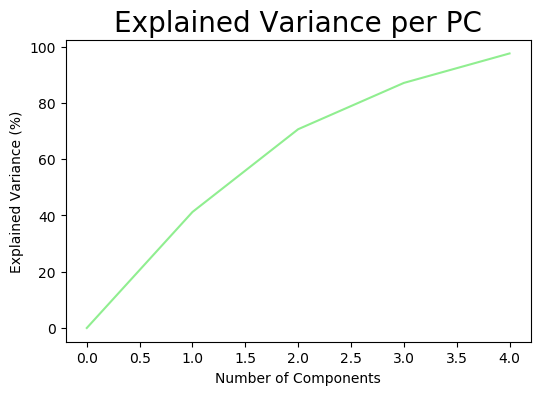

In [271]:
components_list = [i for i in range(n)]
var_ex = []
for n in components_list:
    pca_iter = PCA(n_components=n, random_state=1337)
    pca_iter.fit_transform(scaled)
    print(f'Components: {n}, explained variance: {pca_iter.explained_variance_ratio_.sum() * 100}.')
    var_ex.append(pca_iter.explained_variance_ratio_.sum() * 100)
fig, ax = plt.subplots(dpi=100)

ax.plot(components_list, var_ex, c='lightgreen')
ax.set_title('Explained Variance per No. of Components')
ax.set_ylabel('Explained Variance (%)')
ax.set_xlabel('Number of Components')
ax.set_title('Explained Variance per PC', fontsize=20);

After analysing our PCA and Scree Plot, we can see that we need all the feature for our model to be robust. Thus we will reject the reduced dimension design matrix and proceed with the standard scaled design matrix for clustering.

### 5.2 Clustering

##### $k$-means clustering

The simplest and most popular representative-based clustering method is $k$-means clustering. In this method, the distance function $Dist(\cdot,\cdot)$ is the L2-norm or the squared sum error (SSE), which is just the square of the L2 norm. The representative is chosen to be the mean of the points in the cluster.

Why the mean? Representative-based clustering methods, with $k$ clusters, actually try to minimize the objective function $Q = \sum_{j=1}^k Q_j$ where $Q_j = \sum_{x_i \in C_j} Dist(x_i, y_j)$. For $k$-means, 

$$
Q_j = \sum_{x_i \in C_j} (x_i - y_j)^2.
$$

What should be the value of $y_j$ to minimize $Q_j$? It turns out, it's the mean.

How are the representatives initially selected? The two most common approaches are: 

* randomly assign each data point to a cluster then compute the cluster mean;
* pick $k$ data points and set them as the cluster representative.

The first approach tends to make the representatives closer to the center while the other approach tends to spread them out. There are slight differences in terms of performance but either can be chosen for most cases.

The algorithm has converged if the cluster labels of points do not change after a step.

In `sklearn`, the KMeans class performs $k$-means clustering and it follows the usual fit and predict paradigm.

The following funtion accepts the design matrix, the clustering object, the initial and final values to step through, and, optionally, actual labels. It also returns a dictionary of the cluster labels, internal validation values and, if actual labels is given, external validation values, for every $k$.

For our case, we will limit our results from 2 to 6 clusters:

In [272]:
result_X = cluster_range(scaled, KMeans(random_state=1337), 2, 6)

What is a good clustering? In general, it has the following desired characteristics:
* **Compact**: points in the same cluster should be close together
* **Separated**: points not belonging in the cluster should be far from points in the cluster
* **Balanced**: the number of points in each cluster are comparable
* **Parsimonious**: the number of cluster should be as few as possible

How do we quantify the quality of our clustering? There are internal and external validation criteria that we can use but none of them gives a definite answer as to whether a clustering is good or bad. In practice, whether or not a clustering is good is determined using several validation criteria, usefulness to the problem being solved and ground truth validation.

Lets look at the internal validations:

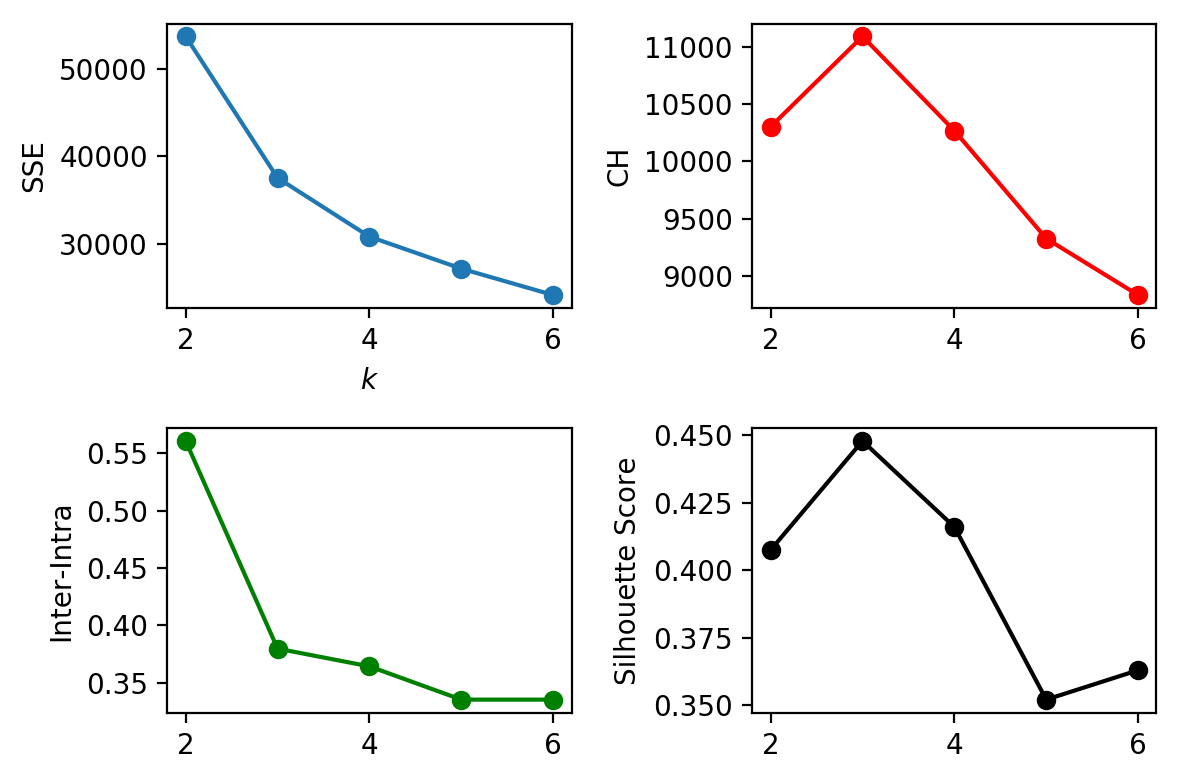

In [273]:
plot_internal(result_X['inertias'], result_X['chs'], result_X['iidrs'], result_X['scs']);

We can observe that:
1. At SSE plot, we can observe the elbow at k = 3

2. Lower inter-intra value is observed also at k = 3

3. Highest value of Calinski-Harabasz Index is observed at k = 3

4. And highest value of Silhoutte Score also at k = 3

Therefore, optimal number of clusters is **3**.

##### 5.2.1 Clustering over all the years

In [274]:
kmeans = KMeans(n_clusters=3, random_state=1337)
y = kmeans.fit_predict(scaled)

In [275]:
df_made['cluster'] = y
df_made_dm['cluster'] = y

In [276]:
df_made_dm.head(2)

,coor1,coor2,quarter,time,zone,cluster
7,259.0,266.0,4.0,71.0,5.0,0
35,54.0,252.0,4.0,59.4,6.0,0


Count of Players per Cluster
Cluster 0: 8055
Cluster 2: 7365
Cluster 1: 1773


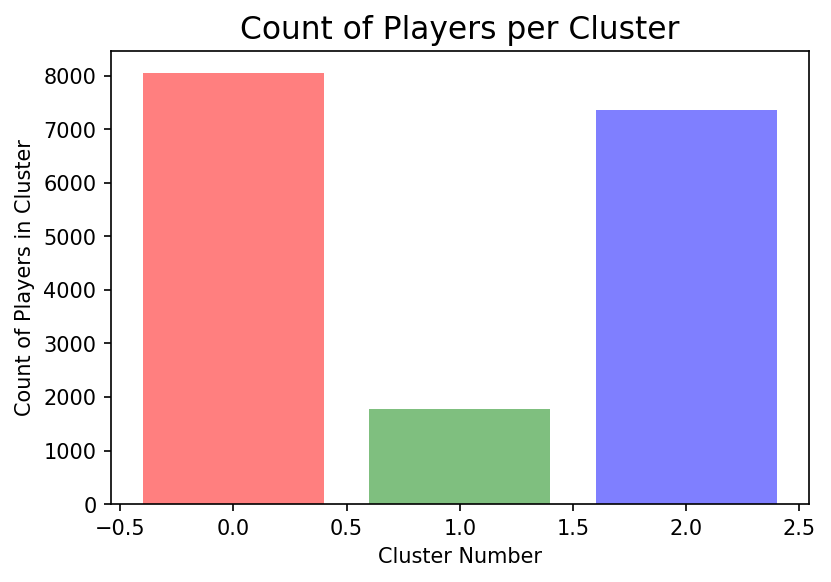

In [277]:
fig, ax = plt.subplots(dpi=150)
ax.bar(Counter(df_made['cluster']).keys(), Counter(df_made['cluster']).values(), 
       color=['red', 'blue', 'green'], alpha=0.5)
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Count of Players in Cluster')
ax.set_title('Count of Players per Cluster', fontsize=15)
print('Count of Players per Cluster')
for i in Counter(df_made['cluster']).keys():
    print(f'Cluster {i}: {Counter(df_made["cluster"])[i]}')

In [278]:
df_0 = df_made[df_made.cluster==0]
df_1 = df_made[df_made.cluster==1]
df_2 = df_made[df_made.cluster==2]

In [279]:
df_made.head(2)

,index,goal,coor1,coor2,date,year,quarter,team,opp,time_rem,time,goal_comment,player,zone,player_concat,cluster
7,7,1.0,259.0,266.0,"Jan 6, 2013",2013,4.0,TOR,OKC,1:11,71.0,Made 2-pointer from 21 ft,Quincy Acy,5.0,QuincyAcy,0
35,35,1.0,54.0,252.0,"Mar 1, 2013",2013,4.0,TOR,IND,0:59.4,59.4,Made 2-pointer from 1 ft,Quincy Acy,6.0,QuincyAcy,0


In [280]:
df_metric = pd.DataFrame(columns=['coor1', 'coor2', 'quarter', 'time', 'zone', 'count', 'player'])
c = []
for i in range(df_made['cluster'].nunique()):
    for metric in df_metric.columns[:-2]:
        df_metric.loc[i, metric] = round(df_made[df_made['cluster']==i][metric].mean(), 2)
    df_metric.loc[i, 'count'] = round(df_made[df_made['cluster']==i].zone.count(), 2)
    df_metric.loc[i, 'player'] = df_made[df_made['cluster']==i].player_concat.nunique()

In [281]:
df_metric

,coor1,coor2,quarter,time,zone,count,player
0,102.95,304.64,4.05,60.29,5.63,8055,585
1,144.9,217.68,5.28,178.53,3.69,1773,287
2,194.24,112.49,4.05,57.41,1.4,7365,536


In [282]:
df_made.player_concat.nunique()

625

In [283]:
df_0.describe()

,index,goal,coor1,coor2,quarter,time,zone,cluster
count,8055.000000,8055.0,8055.00000,8055.000000,8055.000000,8055.000000,8055.000000,8055.0
mean,394.858349,1.0,102.94612,304.641092,4.046182,60.285313,5.627064,0.0
std,354.589441,0.0,62.62018,62.052456,0.209893,34.719097,0.483615,0.0
min,0.000000,1.0,9.00000,250.000000,4.000000,0.000000,5.000000,0.0
25%,113.000000,1.0,56.00000,257.000000,4.000000,30.150000,5.000000,0.0
50%,298.000000,1.0,71.00000,272.000000,4.000000,60.000000,6.000000,0.0
75%,577.000000,1.0,142.00000,343.000000,4.000000,90.000000,6.000000,0.0
max,2075.000000,1.0,289.00000,469.000000,5.000000,120.000000,6.000000,0.0


In [284]:
df_1.describe()

,index,goal,coor1,coor2,quarter,time,zone,cluster
count,1773.000000,1773.0,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.0
mean,505.528483,1.0,144.903553,217.681331,5.275240,178.531810,3.693175,1.0
std,369.061259,0.0,82.602520,112.042445,0.565008,69.225385,2.056083,0.0
min,4.000000,1.0,6.000000,0.000000,5.000000,0.000000,1.000000,1.0
25%,222.000000,1.0,64.000000,125.000000,5.000000,130.000000,2.000000,1.0
50%,429.000000,1.0,131.000000,251.000000,5.000000,183.000000,5.000000,1.0
75%,716.000000,1.0,215.000000,283.000000,5.000000,236.000000,6.000000,1.0
max,2096.000000,1.0,338.000000,469.000000,8.000000,296.000000,6.000000,1.0


In [285]:
df_2.describe()

,index,goal,coor1,coor2,quarter,time,zone,cluster
count,7365.000000,7365.0,7365.000000,7365.000000,7365.000000,7365.000000,7365.000000,7365.0
mean,408.517855,1.0,194.235574,112.491921,4.048065,57.413415,1.397828,2.0
std,355.687051,0.0,89.485399,71.663381,0.213919,35.496911,0.489483,0.0
min,0.000000,1.0,4.000000,0.000000,4.000000,0.000000,1.000000,2.0
25%,127.000000,1.0,109.000000,57.000000,4.000000,26.000000,1.000000,2.0
50%,316.000000,1.0,214.000000,109.000000,4.000000,56.000000,1.000000,2.0
75%,600.000000,1.0,270.000000,162.000000,4.000000,88.000000,2.000000,2.0
max,2098.000000,1.0,422.000000,249.000000,5.000000,120.000000,2.000000,2.0


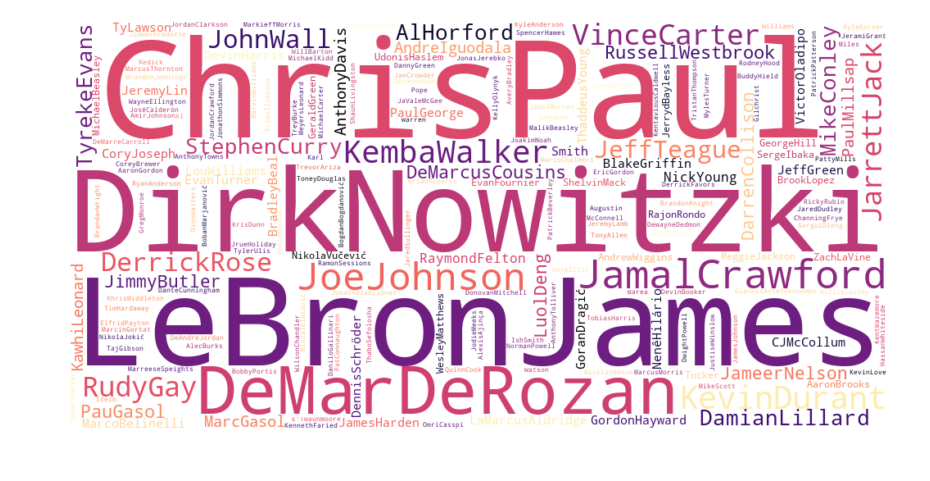

In [286]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False,
            colormap='magma').generate(' '.join(df_0.player_concat))

plt.figure(dpi=150, facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

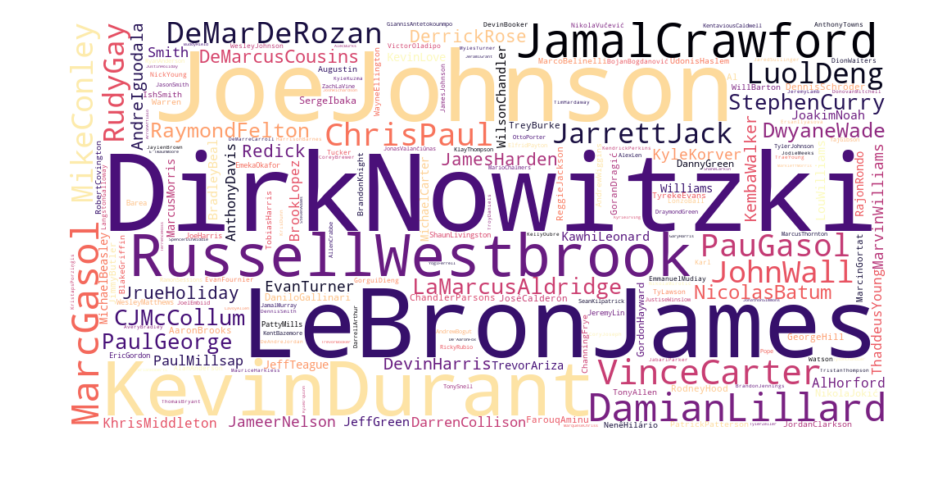

In [287]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False,
            colormap='magma').generate(' '.join(df_1.player_concat))

plt.figure(dpi=150, facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

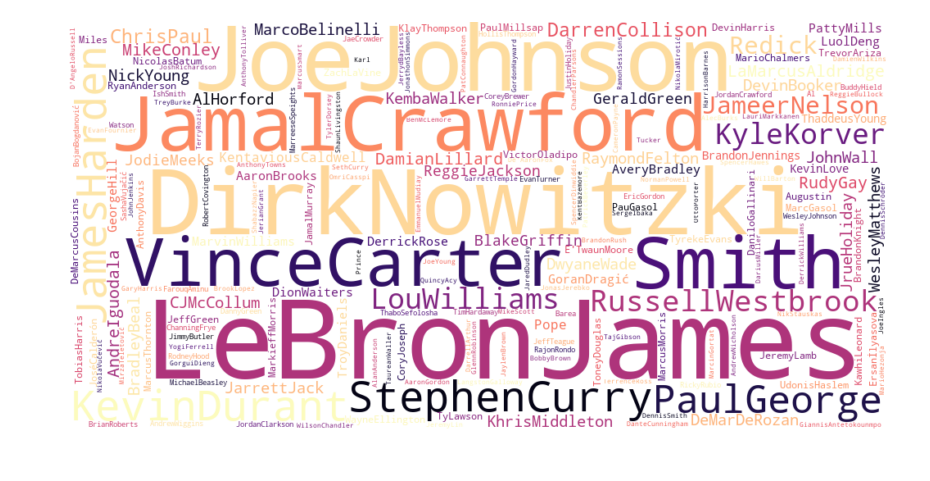

In [288]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False,
            colormap='magma').generate(' '.join(df_2.player_concat))

plt.figure(dpi=150, facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [289]:
df_made_counter = pd.DataFrame(columns=['cluster_0', 'cluster_1', 'cluster_2'])
df_made_counter.cluster_0 = Counter(df_0.player_concat).most_common(15)
df_made_counter.cluster_1 = Counter(df_1.player_concat).most_common(15)
df_made_counter.cluster_2 = Counter(df_2.player_concat).most_common(15)
df_made_counter

,cluster_0,cluster_1,cluster_2
0,"(ChrisPaul, 160)","(DirkNowitzki, 55)","(LeBronJames, 176)"
1,"(LeBronJames, 130)","(JoeJohnson, 45)","(DirkNowitzki, 115)"
2,"(DirkNowitzki, 129)","(LeBronJames, 44)","(JoeJohnson, 112)"
3,"(DeMarDeRozan, 106)","(KevinDurant, 37)","(JamalCrawford, 105)"
4,"(JamalCrawford, 105)","(RussellWestbrook, 35)","(J.R.Smith, 86)"
5,"(JoeJohnson, 94)","(JamalCrawford, 34)","(VinceCarter, 82)"
6,"(KevinDurant, 81)","(DamianLillard, 29)","(StephenCurry, 77)"
7,"(KembaWalker, 80)","(MarcGasol, 28)","(KevinDurant, 77)"
8,"(VinceCarter, 75)","(VinceCarter, 28)","(JamesHarden, 76)"
9,"(JarrettJack, 72)","(ChrisPaul, 22)","(PaulGeorge, 74)"


##### 5.2.2  Clustering over a single year (2016)

In [21]:
df_made = df_w_zones[df_w_zones.goal==1][df_w_zones.zone.isin([1,2,5,6])][df_w_zones.year==2016]
df_made1 = df_made[df_made.quarter == 4][df_made.time <= 120]
df_made2 = df_made[df_made.quarter > 4]
df_made = df_made1.append(df_made2)
df_made['player_concat'] = df_made.player.str.replace(' ', '')
df_made_dm = df_made[['coor1', 'coor2', 'quarter', 'time', 'zone']]

In [23]:
stan_scaler = StandardScaler()
scaled = stan_scaler.fit_transform(df_made_dm)

In [24]:
result_X = cluster_range(scaled, KMeans(random_state=1337), 2, 6)

What is a good clustering? In general, it has the following desired characteristics:
* **Compact**: points in the same cluster should be close together
* **Separated**: points not belonging in the cluster should be far from points in the cluster
* **Balanced**: the number of points in each cluster are comparable
* **Parsimonious**: the number of cluster should be as few as possible

How do we quantify the quality of our clustering? There are internal and external validation criteria that we can use but none of them gives a definite answer as to whether a clustering is good or bad. In practice, whether or not a clustering is good is determined using several validation criteria, usefulness to the problem being solved and ground truth validation.

Lets look at the internal validations:

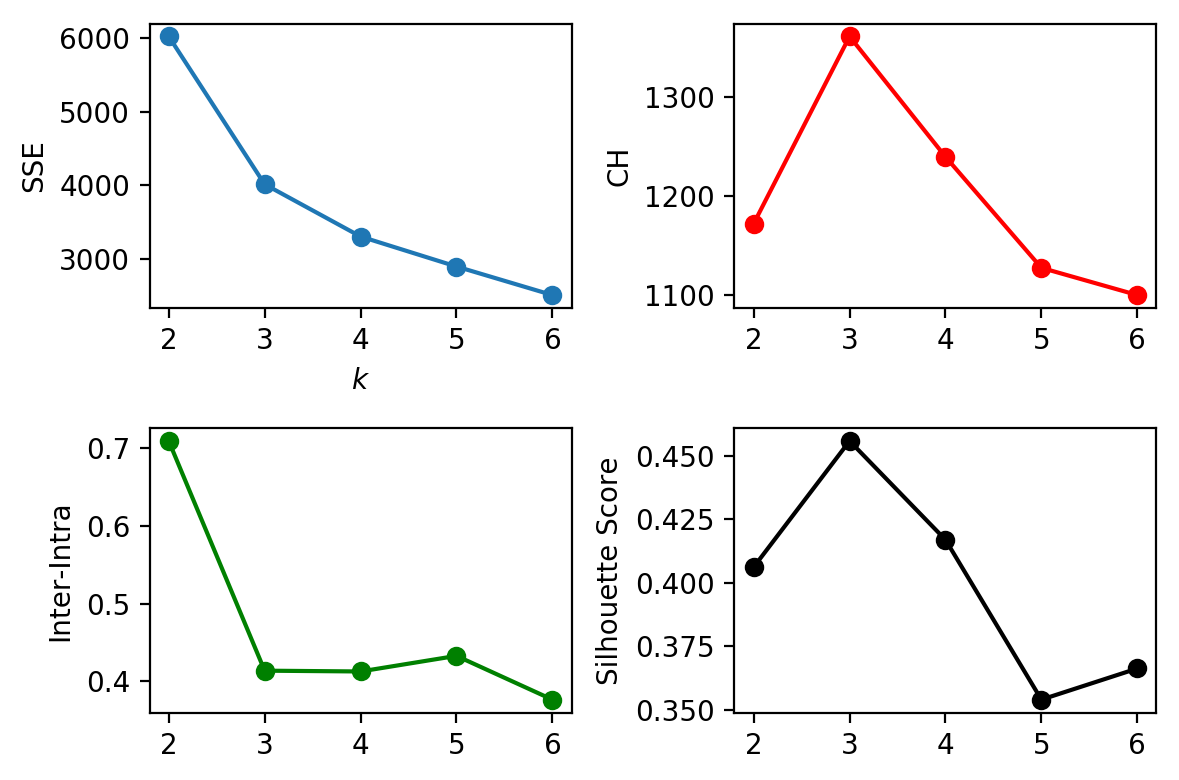

In [25]:
plot_internal(result_X['inertias'], result_X['chs'], result_X['iidrs'], result_X['scs']);

We can observe that:
1. At SSE plot, we can observe the elbow at k = 3

2. Lower inter-intra value is observed also at k = 3

3. Highest value of Calinski-Harabasz Index is observed at k = 3

4. And highest value of Silhoutte Score also at k = 3

Therefore, optimal number of clusters is **3**.

In [26]:
kmeans = KMeans(n_clusters=3, random_state=1337)
y = kmeans.fit_predict(scaled)

In [27]:
df_made['cluster'] = y
df_made_dm['cluster'] = y

In [28]:
df_made_dm.head(2)

,coor1,coor2,quarter,time,zone,cluster
691,302.0,224.0,4.0,116.0,1.0,0
697,199.0,180.0,4.0,30.0,2.0,0


Count of Players per Cluster
Cluster 0: 827
Cluster 2: 880
Cluster 1: 228


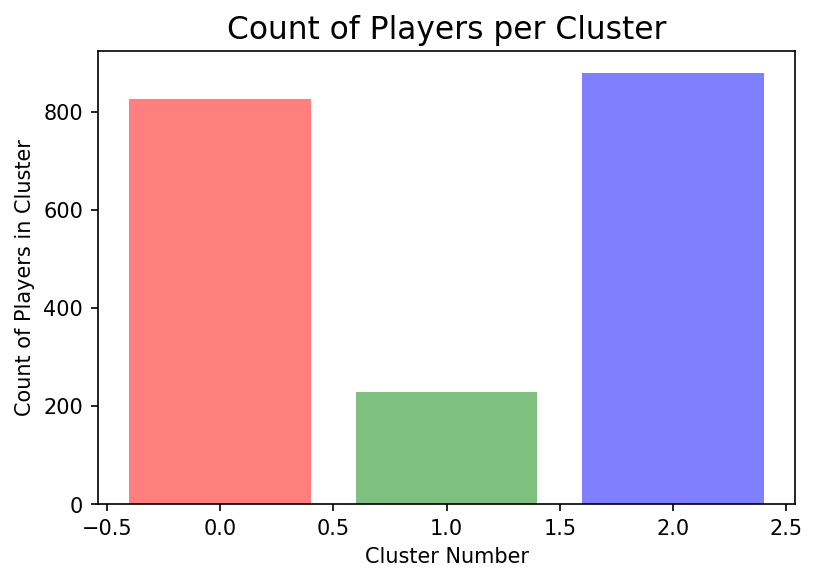

In [29]:
fig, ax = plt.subplots(dpi=150)
ax.bar(Counter(df_made['cluster']).keys(), Counter(df_made['cluster']).values(), 
       color=['red', 'blue', 'green'], alpha=0.5)
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Count of Players in Cluster')
ax.set_title('Count of Players per Cluster', fontsize=15)
print('Count of Players per Cluster')
for i in Counter(df_made['cluster']).keys():
    print(f'Cluster {i}: {Counter(df_made["cluster"])[i]}')

In [30]:
df_0 = df_made[df_made.cluster==0]
df_1 = df_made[df_made.cluster==1]
df_2 = df_made[df_made.cluster==2]

In [31]:
df_made.head(2)

,index,goal,coor1,coor2,date,year,quarter,team,opp,time_rem,time,goal_comment,player,zone,player_concat,cluster
691,145,1.0,302.0,224.0,"Mar 25, 2016",2016.0,4.0,SAC,PHO,1:56,116.0,Made 3-pointer from 25 ft,Quincy Acy,1.0,QuincyAcy,0
697,151,1.0,199.0,180.0,"Mar 27, 2016",2016.0,4.0,SAC,DAL,0:30,30.0,Made 2-pointer from 16 ft,Quincy Acy,2.0,QuincyAcy,0


In [32]:
df_metric = pd.DataFrame(columns=['coor1', 'coor2', 'quarter', 'time', 'zone', 'count', 'player'])
c = []
for i in range(df_made['cluster'].nunique()):
    for metric in df_metric.columns[:-2]:
        df_metric.loc[i, metric] = round(df_made[df_made['cluster']==i][metric].mean(), 2)
    df_metric.loc[i, 'count'] = round(df_made[df_made['cluster']==i].zone.count(), 2)
    df_metric.loc[i, 'player'] = df_made[df_made['cluster']==i].player_concat.nunique()

In [33]:
df_metric

,coor1,coor2,quarter,time,zone,count,player
0,198.62,112.96,4.04,57.41,1.37,827,258
1,144.14,226.31,5.14,176.16,3.85,228,113
2,104.85,312.51,4.03,61.11,5.58,880,288


In [34]:
df_made.player_concat.nunique()

345

In [35]:
df_0.describe()

,index,goal,coor1,coor2,year,quarter,time,zone,cluster
count,827.000000,827.0,827.000000,827.000000,827.0,827.000000,827.000000,827.000000,827.0
mean,372.247884,1.0,198.615478,112.964933,2016.0,4.037485,57.414752,1.374849,0.0
std,329.522400,0.0,89.388085,71.647290,0.0,0.190062,35.136447,0.484377,0.0
min,0.000000,1.0,19.000000,0.000000,2016.0,4.000000,0.000000,1.000000,0.0
25%,101.500000,1.0,120.000000,57.000000,2016.0,4.000000,26.000000,1.000000,0.0
50%,274.000000,1.0,219.000000,108.000000,2016.0,4.000000,56.000000,1.000000,0.0
75%,576.000000,1.0,278.000000,163.000000,2016.0,4.000000,87.000000,2.000000,0.0
max,1673.000000,1.0,410.000000,249.000000,2016.0,5.000000,120.000000,2.000000,0.0


In [36]:
df_1.describe()

,index,goal,coor1,coor2,year,quarter,time,zone,cluster
count,228.000000,228.0,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.0
mean,491.385965,1.0,144.135965,226.311404,2016.0,5.135965,176.162281,3.846491,1.0
std,352.310686,0.0,87.097363,100.233228,0.0,0.343505,69.356736,2.113130,0.0
min,11.000000,1.0,39.000000,3.000000,2016.0,5.000000,5.000000,1.000000,1.0
25%,208.750000,1.0,57.750000,143.750000,2016.0,5.000000,119.000000,2.000000,1.0
50%,456.000000,1.0,122.500000,252.000000,2016.0,5.000000,183.000000,5.000000,1.0
75%,698.250000,1.0,224.000000,278.500000,2016.0,5.000000,231.000000,6.000000,1.0
max,1629.000000,1.0,319.000000,467.000000,2016.0,6.000000,296.000000,6.000000,1.0


In [37]:
df_2.describe()

,index,goal,coor1,coor2,year,quarter,time,zone,cluster
count,880.000000,880.0,880.000000,880.000000,880.0,880.000000,880.000000,880.000000,880.0
mean,374.478409,1.0,104.850000,312.506818,2016.0,4.027273,61.109091,5.577273,2.0
std,342.170539,0.0,63.671103,66.629124,0.0,0.162970,33.788230,0.494274,0.0
min,0.000000,1.0,29.000000,250.000000,2016.0,4.000000,0.000000,5.000000,2.0
25%,107.750000,1.0,57.000000,257.000000,2016.0,4.000000,33.000000,5.000000,2.0
50%,273.500000,1.0,73.000000,281.000000,2016.0,4.000000,61.000000,6.000000,2.0
75%,554.250000,1.0,150.000000,359.000000,2016.0,4.000000,90.000000,6.000000,2.0
max,1783.000000,1.0,284.000000,468.000000,2016.0,5.000000,120.000000,6.000000,2.0


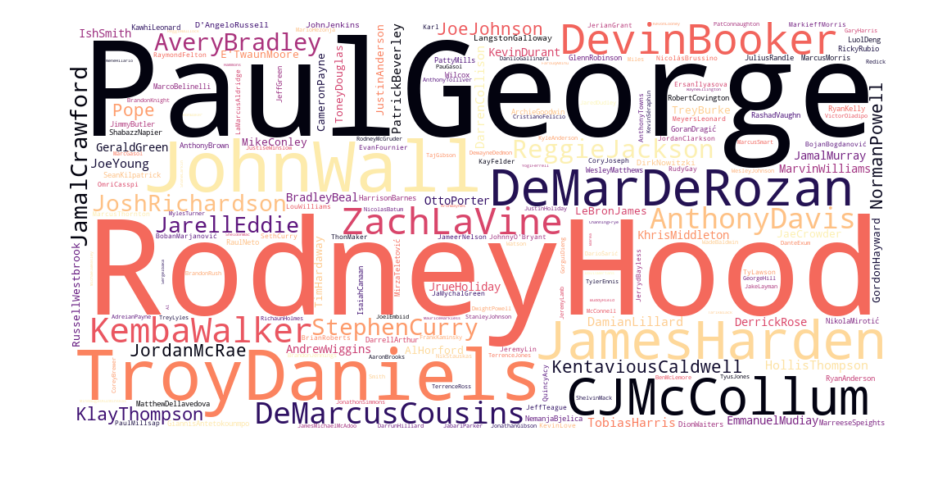

In [38]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False,
            colormap='magma').generate(' '.join(df_0.player_concat))

plt.figure(dpi=150, facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

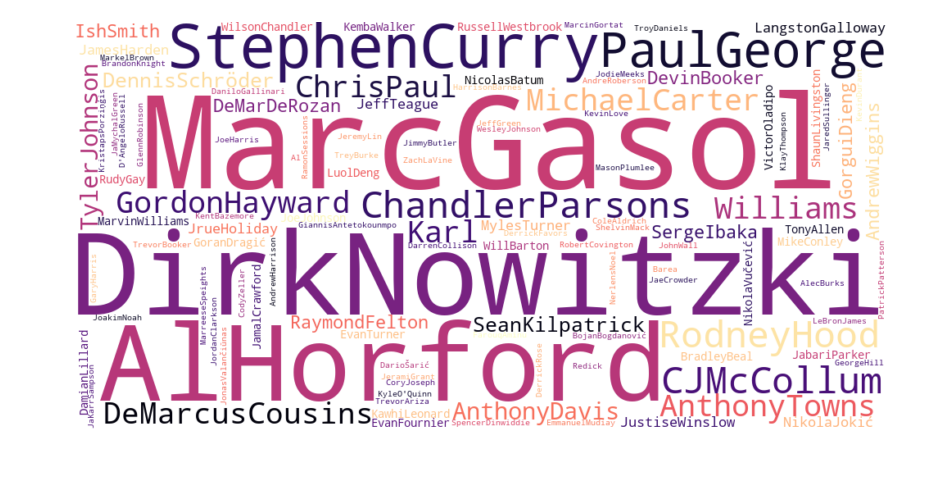

In [39]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False,
            colormap='magma').generate(' '.join(df_1.player_concat))

plt.figure(dpi=150, facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

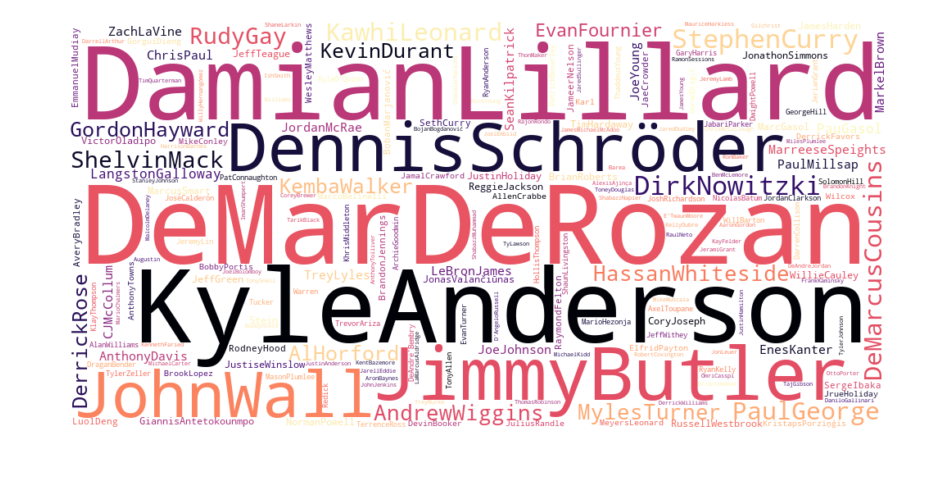

In [40]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False,
            colormap='magma').generate(' '.join(df_2.player_concat))

plt.figure(dpi=150, facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [41]:
df_made_counter = pd.DataFrame(columns=['cluster_0', 'cluster_1', 'cluster_2'])
df_made_counter.cluster_0 = Counter(df_0.player_concat).most_common(15)
df_made_counter.cluster_1 = Counter(df_1.player_concat).most_common(15)
df_made_counter.cluster_2 = Counter(df_2.player_concat).most_common(15)
df_made_counter

,cluster_0,cluster_1,cluster_2
0,"(PaulGeorge, 14)","(MarcGasol, 7)","(DeMarDeRozan, 15)"
1,"(RodneyHood, 14)","(DirkNowitzki, 7)","(KyleAnderson, 13)"
2,"(TroyDaniels, 12)","(AlHorford, 6)","(DamianLillard, 13)"
3,"(JohnWall, 12)","(StephenCurry, 6)","(JimmyButler, 12)"
4,"(JamesHarden, 12)","(PaulGeorge, 5)","(DennisSchröder, 12)"
5,"(DeMarDeRozan, 11)","(RodneyHood, 5)","(JohnWall, 11)"
6,"(CJMcCollum, 11)","(CJMcCollum, 5)","(StephenCurry, 11)"
7,"(DevinBooker, 10)","(ChandlerParsons, 5)","(DirkNowitzki, 11)"
8,"(ZachLaVine, 9)","(GordonHayward, 4)","(PaulGeorge, 10)"
9,"(KembaWalker, 9)","(ChrisPaul, 4)","(KawhiLeonard, 10)"


## 6. Results 

### 6.1 Results for all the years
A) <b>`cluster_0:`</b> 
1. Zones: 5-6, -> This means that this cluster shows dominant players who have higher accuracy towards right end of the court, specifically the middle and the outer portion
2. Quarter: 4-5, -> This means that the players in this cluster were very proactive during 4th and 1st Overtime quarter of the game with higher successful shot.
3. Time: <= 60, -> This means that the players in this cluster had higher probability of shooting during 4th and the 1st overtime quarter from right middle and right outer end of the court within 60 sec of the game time remaining.

From Stakeholder's perspective who are interested in betting for players with higher chance of accuracy of scoring a point specifically in the  last minute of the last quarter and 1st OT who are predominantly right zoned player can bet on these top 15 players out of 702 active players in NBA. 

B) <b>`cluster_1:`</b> 
1. Zones: Mix, -> This means that this cluster shows dominant players who have higher accuracy towards all the zones.
2. Quarter: 5-8, -> This means that the players in this cluster were very proactive during 5-8 quarters which are the Over time quarters, with higher successful shot. 
3. Time: >60, -> This means that the players in this cluster had higher probability of successful shots during Over time quarter for all the zones except inner zone greater than 60 sec of the game time remaining. 

From Stakeholder's perspective who are interested in betting for players with higher chance of accuracy of scoring a point specifically in during the Over time quarters in almost any zones can bet on these top 15 players out of 702 active players in NBA. 

C) <b>`cluster_2:`</b> 
1. Zones: 1-2, -> This means that this cluster shows dominant players who have higher accuracy left end of the court specifically the middle and the outer portion.
2. Quarter: 4-5, -> This means that the players in this cluster were very proactive during 4th and 1st Overtime quarter of the game with higher successful shot.
3. Time: <=60 -> This means that the players in this cluster had higher probability of shooting during 4th and the 1st overtime quarter from right middle and right outer end of the court within 60 sec of the game time remaining.

From Stakeholder's perspective who are interested in betting for players with higher chance of accuracy of scoring a point specifically in the  last minute of the last quarter and 1st OT who are predominantly left zoned player can bet on these top 15 players out of 702 active players in NBA. 


### 6.2 Results for the year 2016

After running our model for year 2016, we observed that the characteristics of each clusters is still stagnant, but from the wordcloud, we observed that there were totally different players compared to the combined years result. From this, we can infer that players who were dominant for the combined years were either low performers or they didn't play enough games(And this turns out to be true for LeBron James), or they switched team(True for Kevin Durant). Nonetheless, the property of our clusters is still preserved and hence, it can be inferred that our stakeholders can still use our model in order to make a data driven decision. 

##### Scope of Improvement: 
1. Our model could have been more robust if we would have used winning probability for each coordinates that we captured from the Shot Chart dataset. 
2. There could be ways where we can fuse the aggregated data(Tabular Shooting data) with our Shot Chart Data to make our model more powerful. But due to granularity of Shooting data and lack of time, we were not able to connect the dots. 
3. We tried to tackle only one perspective of betting. However, this data could be leveraged to multiple perspective of betting, like for example: 
    1. What are the odds that Player A will shoot more than Player B in a given time or from one zone, 
    2. In the opposite to that, what are the chances that Player A will miss more shots compared to Player B and so on.
4. In our model, we only used the data points for Shots that were made by the player. The model can be made more stronger if we could fuse the Shots that were missed data points.

## 7. References and Acknowledgments:

1. Prof Eduardo David

2. AIM Access Lab

3. Stack Overflow